# Sensitivity indices for Sobol's G function

<!-- dom:AUTHOR: Leif Rune
Hellevik -->
<!-- Author: -->  
**Leif Rune Hellevik**, [leif.r.hellevik@ntnu.no](mailto:leif.r.hellevik@ntnu.no)

In this notebook we
illustrate how sensitivity indices may be computed
for Sobol's G function
[Archer et al. 1997](https://www.tandfonline.com/doi/abs/10.1080/00949659708811825). We will demonstrate how both
Monte Carlo methods and
polynomial chaos expansions may be used to
estimate both first order indices and
total indices.

The G function was chosen as an example for two reasons:

* The sensitivity indices have analytical solutions [Saltelli et al. 2010](https://www.sciencedirect.com/user/chooseorg?targetURL=%2Fscience%2Farticle%2Fpii%2FS0010465509003087).

* The G function can be used to generate test cases over a wide spectrum of difficulties

The notebook has four sections; in the first section the G
function is
presented along with the analytical expressions for the sensitivity
indices. The second and third sections demonstrate how polynomial
chaos
expansions and Monte Carlo methods may be used to approximate
the sensitivity
indices. The final section is devoted for comparison
of these two numerical
approaches.

For all sections we make use of the interactive features of the
notebooks, which allow you to experiment with how the values of the G
function
parameters and sample size influence the sensitivity indices
for the G function.
The intention is to let you gain understanding,
experience and intuition in a
efficient and convenient manner.

Run the first cell to initialise plotting and
printing modules for
later use (and system settings).

In [5]:
# ipython magic
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import os, sys, inspect
# Use this if you want to include modules from a subfolder
cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"python_source")))
if cmd_subfolder not in sys.path:
     sys.path.insert(0, cmd_subfolder)

%run matplotlib_header

import matplotlib.pyplot as plt
from present_output import print_vectors_relerror, print_3vectors_relerror

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analytical computation of sensitivity indices for Sobol's G function

<div
id="sec:G_functions"></div>

A function which has proved to be useful as a test
function with analytical solutions for the sensitivity indices is Sobol's G
function which is defined as:

<!-- Equation labels as ordinary links -->
<div id="eq:1"></div>

$$
\begin{equation}
Y=G(X) =  G(X_1, X_2,\ldots,X_k,a_1, a_2,\ldots,a_k)  =
\prod_{i=1}^{k} g_i \label{eq:1} \tag{1}
\end{equation}
$$

where

<!-- Equation labels as ordinary links -->
<div id="eq:2"></div>

$$
\begin{equation}
g_i = \frac{|{4 \, X_i}-2|+{a}_i}{1+{a}_i} \label{eq:2} \tag{2}
\end{equation}
$$

The input factors $X_i$ are assumed to be uniformly
distributed in the
interval $[0,1]$ with positive real-number coefficients $a_i$ $(a_i \geq 0).$  The number of
factors *k* can be varied as the reader
pleases, although the minimum
number to produce a meaningful inference is set at
three.

As you will explore below, the sensitivity $S_i$ of $G(X)$ in
([1](#eq:1)) with respect to a specific input factor $X_i$, will depend
on the
value of the corresponding coefficient $a_i$; small values of
$a_i$ (e.g.
$a_i=0$) will yield a high corresponding $S_i$, meaning
that $X_i$ is an
important/influential variable on the variance or
uncertainty of $G(X)$.

We have
implemented Sobol's G function in ([1](#eq:1)) and ([2](#eq:2))
in the code
snippet below:

In [6]:
# model function
import numpy as np
from numba import jit

@jit
def g(Xj,aj):
    return (np.abs(4*Xj-2.)+aj)/(1+aj)

@jit
def G(X,a):
    G_vector=np.ones(X.shape[0])

    for j, aj in enumerate(a):
        np.multiply(G_vector,g(X[:,j],aj),G_vector)
    return G_vector

For computational efficiency we make use of `just in time` compilation
from
`numba`. If you have not installed `numba`, you
may comment out
the lines with `@jit` - the cells will run anyway,
albeit probably somewhat slower.

The sensitivity indices $S_i$ and $S_{Ti}$ for $Y=G(X)$ in
eq.
([1](#eq:1)) may be derived as outlined in [Saltelli et al. 2010](https://www.sciencedirect.com/science/article/pii/S0010465509003087).
The conditional variance $V_i$ is:

<!-- Equation labels as ordinary links -->
<div id="eq:Vi"></div>

$$
\begin{equation}
V_i = V_{X_i} \left (E_{X_{\sim i}} (Y \;| \;X_{i}) \right) =
\frac{1/3}{(1+a_i)^2} \label{eq:Vi} \tag{3}
\end{equation}
$$

<!-- while the conditional variance $V\left (E(Y \; | \; X_{i_1}, X_{i_1},
X_{i_1}, \ldots, X_{i_s}) \right)$ is given by: -->

<!-- !bt -->
<!--
\begin{equation} -->
<!-- V\left (E(Y \; | \; X_{i_1}, X_{i_1}, X_{i_1}, \ldots,
X_{i_s}) \right) = \prod_{j=1}^{s} \left (1 + V_j \right) -1 <div
id="eq:Vscond"></div> -->
<!-- \end{equation} -->
<!-- !et -->

while the
$V_{T_I}$ and the total variance $V$ are given by:

<!-- Equation labels as ordinary links -->
<div id="eq:4"></div>

$$
\begin{equation}
V_{T_i} = V_i \; \prod_{j\neq i} (1+V_j) \qquad \text{and}
\qquad V = \prod_{i=1}^k (1+V_i) -1
\label{eq:4} \tag{4}
\end{equation}
$$

Consequently the first order sensitivity indices $S_i$ of $Y=G(X)$, are given by

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
S_i=\frac{V_i}{V}
\label{_auto1} \tag{5}
\end{equation}
$$

<!-- The expressions for the variance obtained when keeping one parameter -->
<!-- fixed and varying all the others can be found below alow with the -->
<!--
expression for the total variance.  The Sensitivity indices -->
<!-- expressions
can be easily retrieved from these. -->

In the code snippet below one can
interactively experiment how the values of $a_i$ affect the correspoding
$S_i$, i.e the
sensitivity of $G$ with respect to $X_i$.

<IPython.core.display.Javascript object>


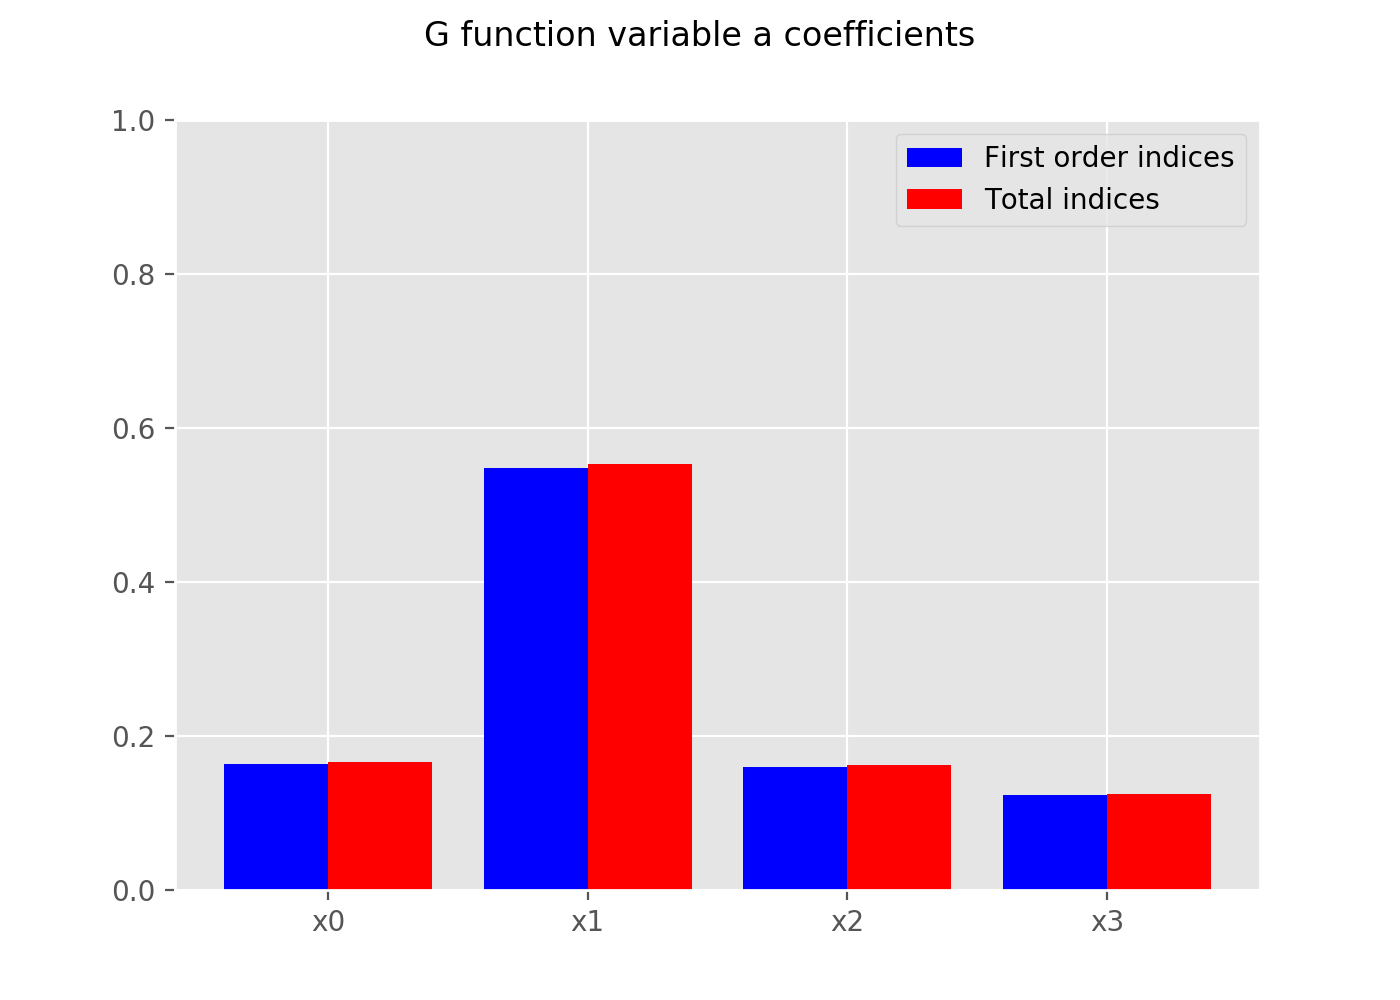

Output()

In [7]:
# Analytical computations
f, ax = plt.subplots(1,1)
f.suptitle('G function variable a coefficients')

# import modules
import numpy as np

def Vi(ai):
    return 1/(3*(1+ai)**2)

def V(a_prms):
    D=1
    for a in a_prms:
        D*=(1+Vi(a))     
    return D-1

def S_i(ai,a):
    return Vi(ai)/V(a)

def S_T(ai,a):
    Dtot=V(a)
    return (Dtot+1)/(Vi(ai)+1)*Vi(ai)/Dtot

def update_Sobol(**kwargs):
    ax.clear()
    for key, value in kwargs.items(): #find indx and value for a_prms
        pre,post = key.split("a")
        assert pre==""
        a_prms[int(post)] = value
    
    width=0.4
    x_tick_list=np.arange(len(a_prms))+1
    ax.set_xticks(x_tick_list+width/2)
    x_labels=['x'+str(i) for i in np.arange(len(a_prms))]
    ax.set_xticklabels(x_labels)
    ax.set_ylim(0,1)
    
    for i, a in enumerate(a_prms):
        Si[i]=S_i(a,a_prms)
        ST[i]=S_T(a,a_prms)
        
    ax.bar(x_tick_list,Si,width,color='blue')
    ax.bar(x_tick_list+width,ST,width,color='red')        
    ax.legend(['First order indices','Total indices'])


# Analytical sliders
k=4 #number of prms
a_lbls=['a'+str(i) for i in np.arange(k)]
Si=np.zeros(k)
ST=np.zeros(k)
a_prms=np.zeros(k)

import ipywidgets as widgets    
my_sliders=[]
for i in range(k):
    my_sliders.append(widgets.FloatSlider(min=0, max=15, value=6.52, description=a_lbls[i]))

slider_dict = {slider.description:slider for slider in my_sliders}
ui_left = widgets.VBox(my_sliders[0::2]) 
ui_right = widgets.VBox(my_sliders[1::2])
ui=widgets.HBox([ui_left,ui_right])

out=widgets.interactive_output(update_Sobol, slider_dict) 
display(ui,out)

Do you observe the effect stated above, that small
values of
$a_i$ (e.g. $a_i=0$) will yield high corresponding $S_i$? You may
change all the parameters simultaneously or one at the time.

You may also
change the number of parameters *k* directly in the
python-code, however note
that this will affect the
computing time. In particular, the
computing time for the numerical
approximations with *chaospy* will be sensitive
to *k*.

If more than one factor has low $a_i$, high order interactions among factors will
be tangible.

* The extreme case is setting all $a_i$’s to zero. In this circumstance, all factors will interact and will be of equal importance -> check it out!

* How would you assess a setting with only some $a_i$’s are zero and all others are large (e.g. $a_i \geq 9$ )?

Note that the G function has a singularity in each of its $k$ dimensions corresponding to the points $X_i = 1/2$.  

## Approximation of the sensitivity indices for Sobol's G function with spectral expansions

In this section we show how the spectral expansion module [chaospy](https://github.com/jonathf/chaospy) may
be used to compute the Sobol indices for Sobol's G function.  A more in-depth treatment of
`chaospy` and its usage is provided in the separate notebook [A
practical introduction to polynomial chaos with the1 `chaospy`
package](introduction_gpc.ipynb). Furthermore, you may find our previous "A
Guide to Uncertainty Quantification and Sensitivity Analysis for
Cardiovascular
Applications" [Eck et al. 2015](https://onlinelibrary.wiley.com/doi/full/10.1002/cnm.2755) as a useful
introduction to how polynomial chaos expansions may be used for
UQ&S. We are therefore focusing on
the application of the spectral
expansions and how this benchmarks against the
analytical solutions for the
indices, rather than presenting the spectral
expansion theory.

In [10]:
# Si with chaospy for G-function
import chaospy as cp 
jpdf = cp.Iid(cp.Uniform(),k)
    
polynomial_order = 4
poly = cp.orth_ttr(polynomial_order, jpdf)

#Ns=2*len(poly)
Ns=500
print('Number of samples for chaospy: ', Ns) 
X=jpdf.sample(Ns)
G_sample=G(X.transpose(),a_prms)

approx = cp.fit_regression(poly, X, G_sample)

exp_pc = cp.E(approx, jpdf)
std_pc = cp.Std(approx, jpdf)
print("Statistics polynomial chaos\n")
print('\n        E(Y)  |  std(Y) \n')
print('pc  : {:2.5f} | {:2.5f}'.format(float(exp_pc), std_pc))
S_pc = cp.Sens_m(approx, jpdf) #Si from chaospy
S_tpc = cp.Sens_t(approx, jpdf) #Total effect sensitivity index from chaospy
row_labels= ['S_'+str(idx) for idx in range(k)]
col_labels=['Chaospy','Analytical','Error (%)']


print("\nFirst Order Indices")

print_vectors_relerror(S_pc,Si,col_labels,row_labels,[3,3,0])

print("\n\nTotal Effect Indices")
row_labels= ['St_'+str(idx) for idx in range(k)]
print_vectors_relerror(S_tpc,ST,col_labels,row_labels,[3,3,0])

Number of samples for chaospy:  500
Statistics polynomial chaos


        E(Y)  |  std(Y) 

pc  : 0.99843 | 0.14297

First Order Indices
     Chaospy  Analytical  Error (%)
S_0    0.163       0.163        0.0
S_1    0.546       0.548        0.0
S_2    0.157       0.160        2.0
S_3    0.125       0.123        2.0


Total Effect Indices
      Chaospy  Analytical  Error (%)
St_0    0.167       0.166        1.0
St_1    0.552       0.553        0.0
St_2    0.161       0.163        1.0
St_3    0.129       0.125        3.0


In the code-snippet above we compare both the first order indices `S_pc` and the
total indices `S_tpc` computed with chaospy, and print them in columns along
side the analytical indices and the relative errors. You may experiment how the
error is affected by the number of samples `Ns`.

### Spectral expansions for computation of  Sobol's sensitivity indices

To better facilitate and encourage
your experimentation with the impact of changes in the coefficients $a_i$,
number of samples, and polynomial order for the spectral expansions in the
chaospy module, we make use of interactive widgets with sliders for all these
coefficients and variables.

Run the code snippet below, and you will see
sliders for $a_i$, number
of samples `NS` and polynomial order. Once you change
one of the slider
values, the chaospy approximations of the sensitivity indices
is recomputed and the new results will be presented. Bear in mind that
the computational time is dependent on the number of samples and the
_cpu_ capacity of the machine you are running this notebook on.

In [9]:
# chaospy G-function with sliders
import chaospy as cp

if not 'jpdf' in globals():
    jpdf = cp.Iid(cp.Uniform(),k) #the joint pdf
    print('Create the joint pdf')


def update_chaospy_G(**kwargs):
    NS=kwargs['NS']
    del kwargs['NS']
    polynomial_order=kwargs['polynomial_order']
    del kwargs['polynomial_order']
    
    for key, value in kwargs.items(): #find indx and value for a_prms
        pre,post = key.split("a")
        assert pre==""
        a_prms[int(post)] = value
    
    X=jpdf.sample(NS)
    print('Number of samples: ',NS)

    G_sample=G(X.transpose(),a_prms)

    poly = cp.orth_ttr(polynomial_order, jpdf)
    approx = cp.fit_regression(poly, X, G_sample)

    exp_pc = cp.E(approx, jpdf)
    std_pc = cp.Std(approx, jpdf)
    print("Statistics polynomial chaos\n")
    print('\n        E(Y)  |  std(Y) \n')
    print('pc  : {:2.5f} | {:2.5f}'.format(float(exp_pc), std_pc))
    S_pc = cp.Sens_m(approx, jpdf) #Si from chaospy
    S_tpc = cp.Sens_t(approx, jpdf) #Total effect sensitivity index from chaospy
    
    row_labels= ['S_'+str(idx) for idx in range(len(a_prms))]
    col_labels=['Chaospy','Analytical','Error (%)']

    print("\nFirst Order Indices")
    print_vectors_relerror(S_pc,Si,col_labels,row_labels,[3,3,0])

    print("\n\nTotal Effect Indices")
    row_labels= ['St_'+str(idx) for idx in range(k)]
    print_vectors_relerror(S_tpc,ST,col_labels,row_labels,[3,3,0])


if (len(my_sliders)==len(a_prms)):   #add sliders if not added before
    my_sliders.append(widgets.IntSlider(min=500,max=5100,step=250,value=500,description='NS')) #add slider for samples
    my_sliders.append(widgets.IntSlider(description='polynomial_order', min=1,max=6,value=4)) # add slider for polynomial order

    slider_dict = {slider.description:slider for slider in my_sliders} #add the sliders in the dictionary 

    ui_left = widgets.VBox(my_sliders[0::2]) 
    ui_right = widgets.VBox(my_sliders[1::2])
    ui=widgets.HBox([ui_left,ui_right])


out=widgets.interactive_output(update_chaospy_G, slider_dict) 
display(ui,out)

# end chaospy G-function with sliders

Create the joint pdf


Output()

### Monte Carlo simulations for computation of sensitivity indices

The snippet of code below allows to evaluate the Sobol sensitivity indices for the same $G$ function in a Monte Carlo simulation. In analogy with the previous example, one can again vary the $a_i$ coefficients along with the number of runs of the simulation.

In [6]:
# Si with monte carlo for G-function

import monte_carlo as mc
a_prms=np.ones(k)

if not 'jpdf' in globals():
    cp.seed(0)
    jpdf = cp.Iid(cp.Uniform(),k) #the joint pdf
    print('Create the joint pdf')

def update_mc_G(**kwargs):
    Ns=kwargs['NS']
    del kwargs['NS']
    
    for key, value in kwargs.items(): #find indx and value for a_prms
        pre,post = key.split("a")
        assert pre==""
        a_prms[int(post)] = value
        


    print('Number of samples for Monte Carlo: ', Ns) 
    X=jpdf.sample(Ns)
    A, B, C = mc.generate_sample_matrices_mc(Ns, k, jpdf, sample_method='R') #A, B, C already transposed
    G_A_sample = G(A, a_prms)
    G_B_sample = G(B, a_prms)
    G_C_sample_list = np.array([G(C_i, a_prms) for C_i in C]).T
    
    exp_mc = np.mean(G_A_sample)
    std_mc = np.std(G_A_sample)
    print("Statistics Monte Carlo\n")
    print('\n        E(Y)  |  std(Y) \n')
    print('mc  : {:2.5f} | {:2.5f}'.format(float(exp_mc), std_mc))
    
    S_mc, S_tmc = mc.calculate_sensitivity_indices_mc(G_A_sample, G_B_sample, G_C_sample_list)
    row_labels= ['S_'+str(idx) for idx in range(k)]
    col_labels=['Monte carlo','Analytical','Error (%)']
    
    print("\nFirst Order Indices")
    import analytical_g_function as agf
    
    Si=np.zeros(k)
    ST=np.zeros(k)
    for i, a in enumerate(a_prms):
        Si[i]=agf.S_i(a,a_prms)
        ST[i]=agf.S_T(a,a_prms)
     
    print_vectors_relerror(S_mc, Si, col_labels, row_labels, [3,3,0])
    
    print("\n\nTotal Effect Indices")
    row_labels= ['St_'+str(idx) for idx in range(k)]
    print_vectors_relerror(S_tmc, ST, col_labels, row_labels, [3,3,0])

## Set up the sliders 
mc_sliders=[]
for i in range(k):
    mc_sliders.append(widgets.FloatSlider(min=0, max=15, value=6.52, description=a_lbls[i]))

mc_sliders.append(widgets.IntSlider(min=500,max=25000,step=250,value=500,description='NS')) #add slider for samples
    
slider_dict = {slider.description:slider for slider in mc_sliders} #add the sliders in the dictionary 

ui_left = widgets.VBox(mc_sliders[0::2]) 
ui_right = widgets.VBox(mc_sliders[1::2])
ui=widgets.HBox([ui_left,ui_right])

out=widgets.interactive_output(update_mc_G, slider_dict) 
display(ui,out)

### Comparison of MC and PC for sensitivity indices computations

Finally, the performance of the two approaches can be compared by benchmarking against the analytical values of the indices. Which approach performs better? Under which combination of $a_i$ coefficients? How many runs are required in order to get an error below a given threshold (e.g. 5%, 1%)?

In [7]:
# Si comparison of mc and pc for G-function

import monte_carlo as mc
a_prms=np.ones(k)

if not 'jpdf' in globals():
    cp.seed(0)
    jpdf = cp.Iid(cp.Uniform(),k) #the joint pdf
    print('Create the joint pdf')

def update_cmp(**kwargs):
    NsMC=kwargs['NsMC']
    del kwargs['NsMC']

    NsPC=kwargs['NsPC']
    del kwargs['NsPC']
    
    for key, value in kwargs.items(): #find indx and value for a_prms
        pre,post = key.split("a")
        assert pre==""
        a_prms[int(post)] = value
        
    ## Monte Carlo update
    print('Number of samples for Monte Carlo: ', NsMC) 
    X_mc=jpdf.sample(NsMC)
    A, B, C = mc.generate_sample_matrices_mc(NsMC, k, jpdf, sample_method='R') #A, B, C already transposed
    G_A_sample = G(A, a_prms)
    G_B_sample = G(B, a_prms)
    G_C_sample_list = np.array([G(C_i, a_prms) for C_i in C]).T
    
    exp_mc = np.mean(G_A_sample)
    std_mc = np.std(G_A_sample)
    print("Statistics Monte Carlo\n")
    print('\n        E(Y)  |  std(Y) \n')
    print('mc  : {:2.5f} | {:2.5f}'.format(float(exp_mc), std_mc))
    
    S_mc, S_tmc = mc.calculate_sensitivity_indices_mc(G_A_sample, G_B_sample, G_C_sample_list)
    
    ## PC update
    Xpc=jpdf.sample(NsPC)
    G_sample=G(Xpc.transpose(),a_prms)

    approx = cp.fit_regression(poly, Xpc, G_sample)
    
    exp_pc = cp.E(approx, jpdf)
    std_pc = cp.Std(approx, jpdf)
    print("Statistics polynomial chaos\n")
    print('\n        E(Y)  |  std(Y) \n')
    print('pc  : {:2.5f} | {:2.5f}'.format(float(exp_pc), std_pc))
    S_pc = cp.Sens_m(approx, jpdf) #Si from chaospy
    S_tpc = cp.Sens_t(approx, jpdf) #Total effect sensitivity index from chaospy

    import analytical_g_function as agf
    Si=np.zeros(k)
    ST=np.zeros(k)
    for i, a in enumerate(a_prms):
        Si[i]=agf.S_i(a,a_prms)
        ST[i]=agf.S_T(a,a_prms)
    
    row_labels= ['S_'+str(idx) for idx in range(k)]
    col_labels=['Monte Carlo','Err (%)','PolyChaos','Err (%)']
    
    print("\nFirst Order Indices")
    print_3vectors_relerror(S_mc,S_pc, Si, col_labels, row_labels, [3,0,3,0])
    
    print("\n\nTotal Effect Indices")
    row_labels= ['St_'+str(idx) for idx in range(k)]
    print_3vectors_relerror(S_tmc,S_tpc, ST, col_labels, row_labels, [3,0,3,0])

## Set up the sliders 
cmp_sliders=[]
for i in range(k):
    cmp_sliders.append(widgets.FloatSlider(min=0, max=15, value=6.52, description=a_lbls[i]))

cmp_sliders.append(widgets.IntSlider(min=500,max=100000,step=250,value=500,description='NsMC')) #slider for MC samples
cmp_sliders.append(widgets.IntSlider(min=500,max=2000,step=250,value=500,description='NsPC')) #slider for PC samples
    
slider_dict = {slider.description:slider for slider in cmp_sliders} #add the sliders in the dictionary 

ui_left = widgets.VBox(cmp_sliders[0::2]) 
ui_right = widgets.VBox(cmp_sliders[1::2])
ui=widgets.HBox([ui_left,ui_right])

out=widgets.interactive_output(update_cmp, slider_dict) 
display(ui,out)